
# 📊 Classificação de Grãos de Trigo com Machine Learning

Este notebook aplica a metodologia **CRISP-DM** para desenvolver um modelo de aprendizado de máquina capaz de classificar variedades de grãos de trigo com base em características físicas. O objetivo é automatizar um processo que, em cooperativas agrícolas de pequeno porte, ainda é realizado manualmente.

---

## 🔍 Etapas:
1. **Entendimento dos dados**
2. **Pré-processamento**
3. **Treinamento de modelos**
4. **Otimização**
5. **Avaliação de desempenho**
6. **Conclusão**

---


# Classificação de Grãos de Trigo com CRISP-DM 🌾
Cap 3 - (IR ALÉM) Implementando algoritmos de Machine Learning com Scikit-learn.

Neste notebook, seguiremos a metodologia **CRISP-DM** para classificar variedades de grãos com base em suas características físicas.

In [1]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

sns.set(style="whitegrid")

## 🔽 Carregamento e visualização dos dados

In [2]:
# Upload do arquivo seeds_dataset.txt manualmente
from google.colab import files
uploaded = files.upload()

Saving seeds_dataset.txt to seeds_dataset.txt


In [3]:
# Carregar dataset e nomear colunas
colunas = ["area", "perimetro", "compacidade", "comprimento_nucleo",
           "largura_nucleo", "coef_assimetria", "sulco_nucleo", "variedade"]
df = pd.read_csv("seeds_dataset.txt", sep='\s+', names=colunas)
df.head()

,area,perimetro,compacidade,comprimento_nucleo,largura_nucleo,coef_assimetria,sulco_nucleo,variedade
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## 📊 Análise Estatística e Visualização

In [4]:
print(df.describe())
print("\nValores ausentes por coluna:\n", df.isnull().sum())

             area   perimetro  compacidade  comprimento_nucleo  \
count  210.000000  210.000000   210.000000          210.000000   
mean    14.847524   14.559286     0.870999            5.628533   
std      2.909699    1.305959     0.023629            0.443063   
min     10.590000   12.410000     0.808100            4.899000   
25%     12.270000   13.450000     0.856900            5.262250   
50%     14.355000   14.320000     0.873450            5.523500   
75%     17.305000   15.715000     0.887775            5.979750   
max     21.180000   17.250000     0.918300            6.675000   

       largura_nucleo  coef_assimetria  sulco_nucleo   variedade  
count      210.000000       210.000000    210.000000  210.000000  
mean         3.258605         3.700201      5.408071    2.000000  
std          0.377714         1.503557      0.491480    0.818448  
min          2.630000         0.765100      4.519000    1.000000  
25%          2.944000         2.561500      5.045000    1.000000  
50%

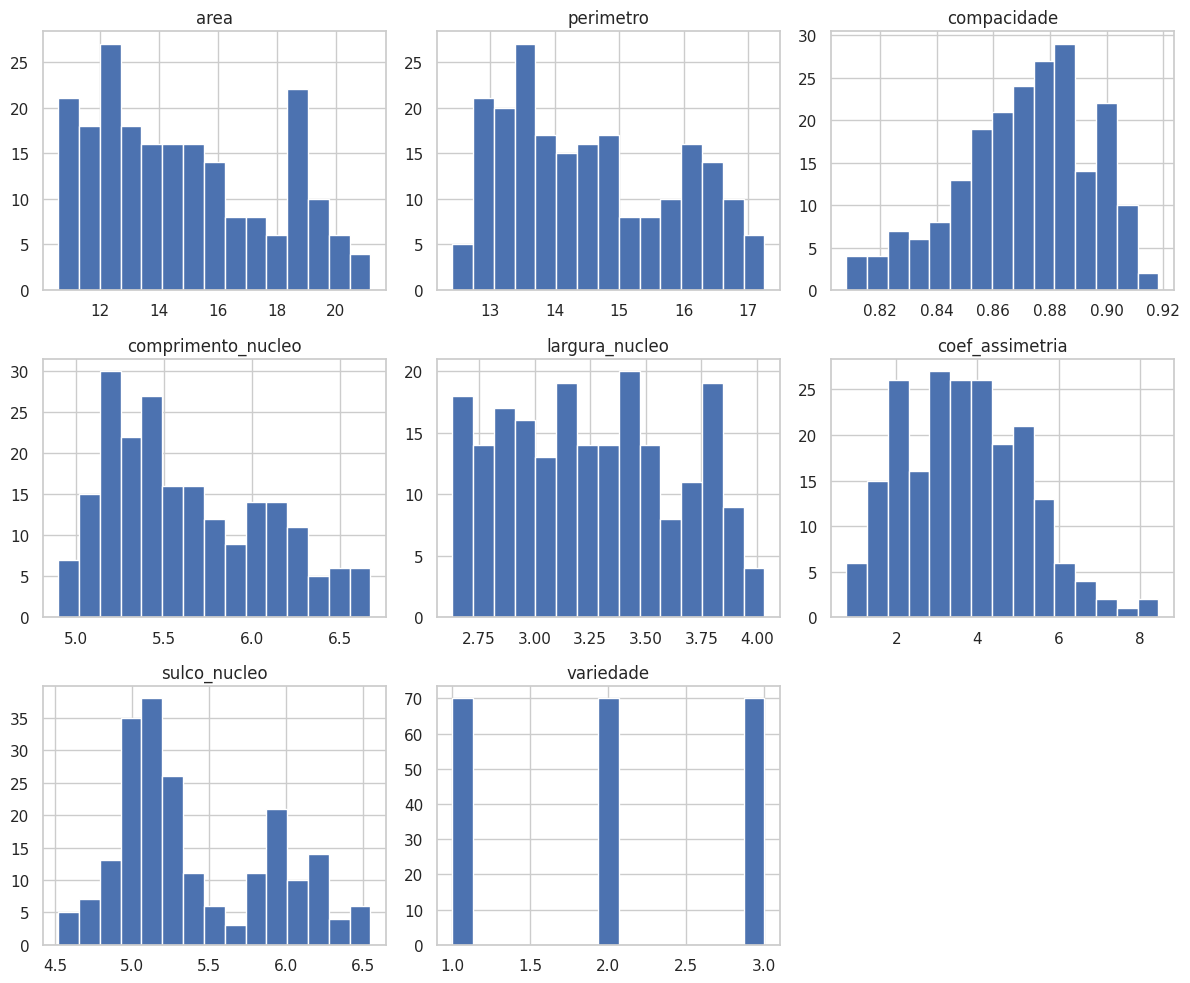

In [5]:
# Histogramas
df.hist(bins=15, figsize=(12, 10))
plt.tight_layout()
plt.show()

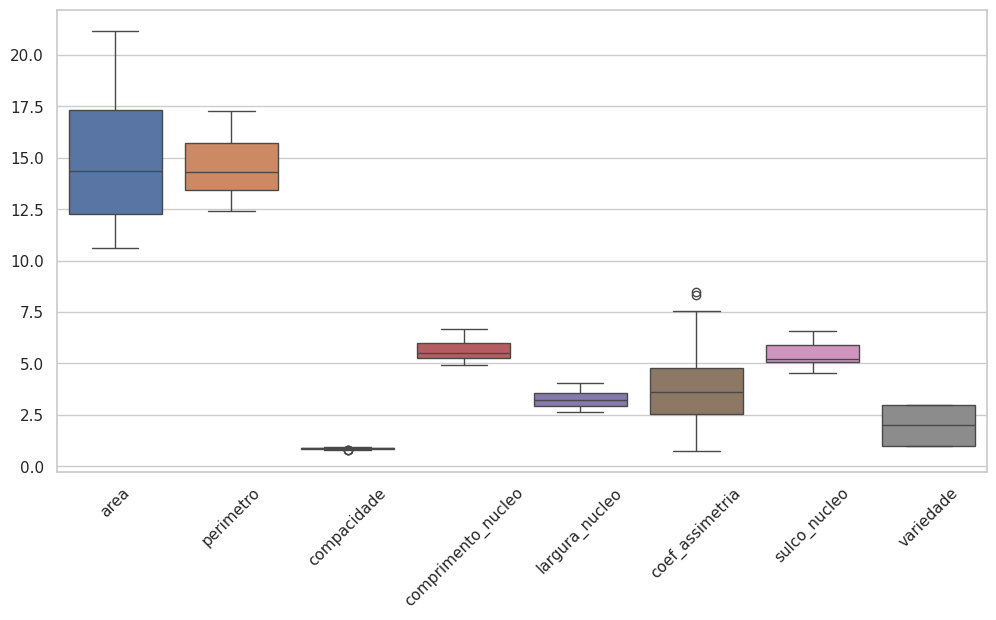

In [6]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

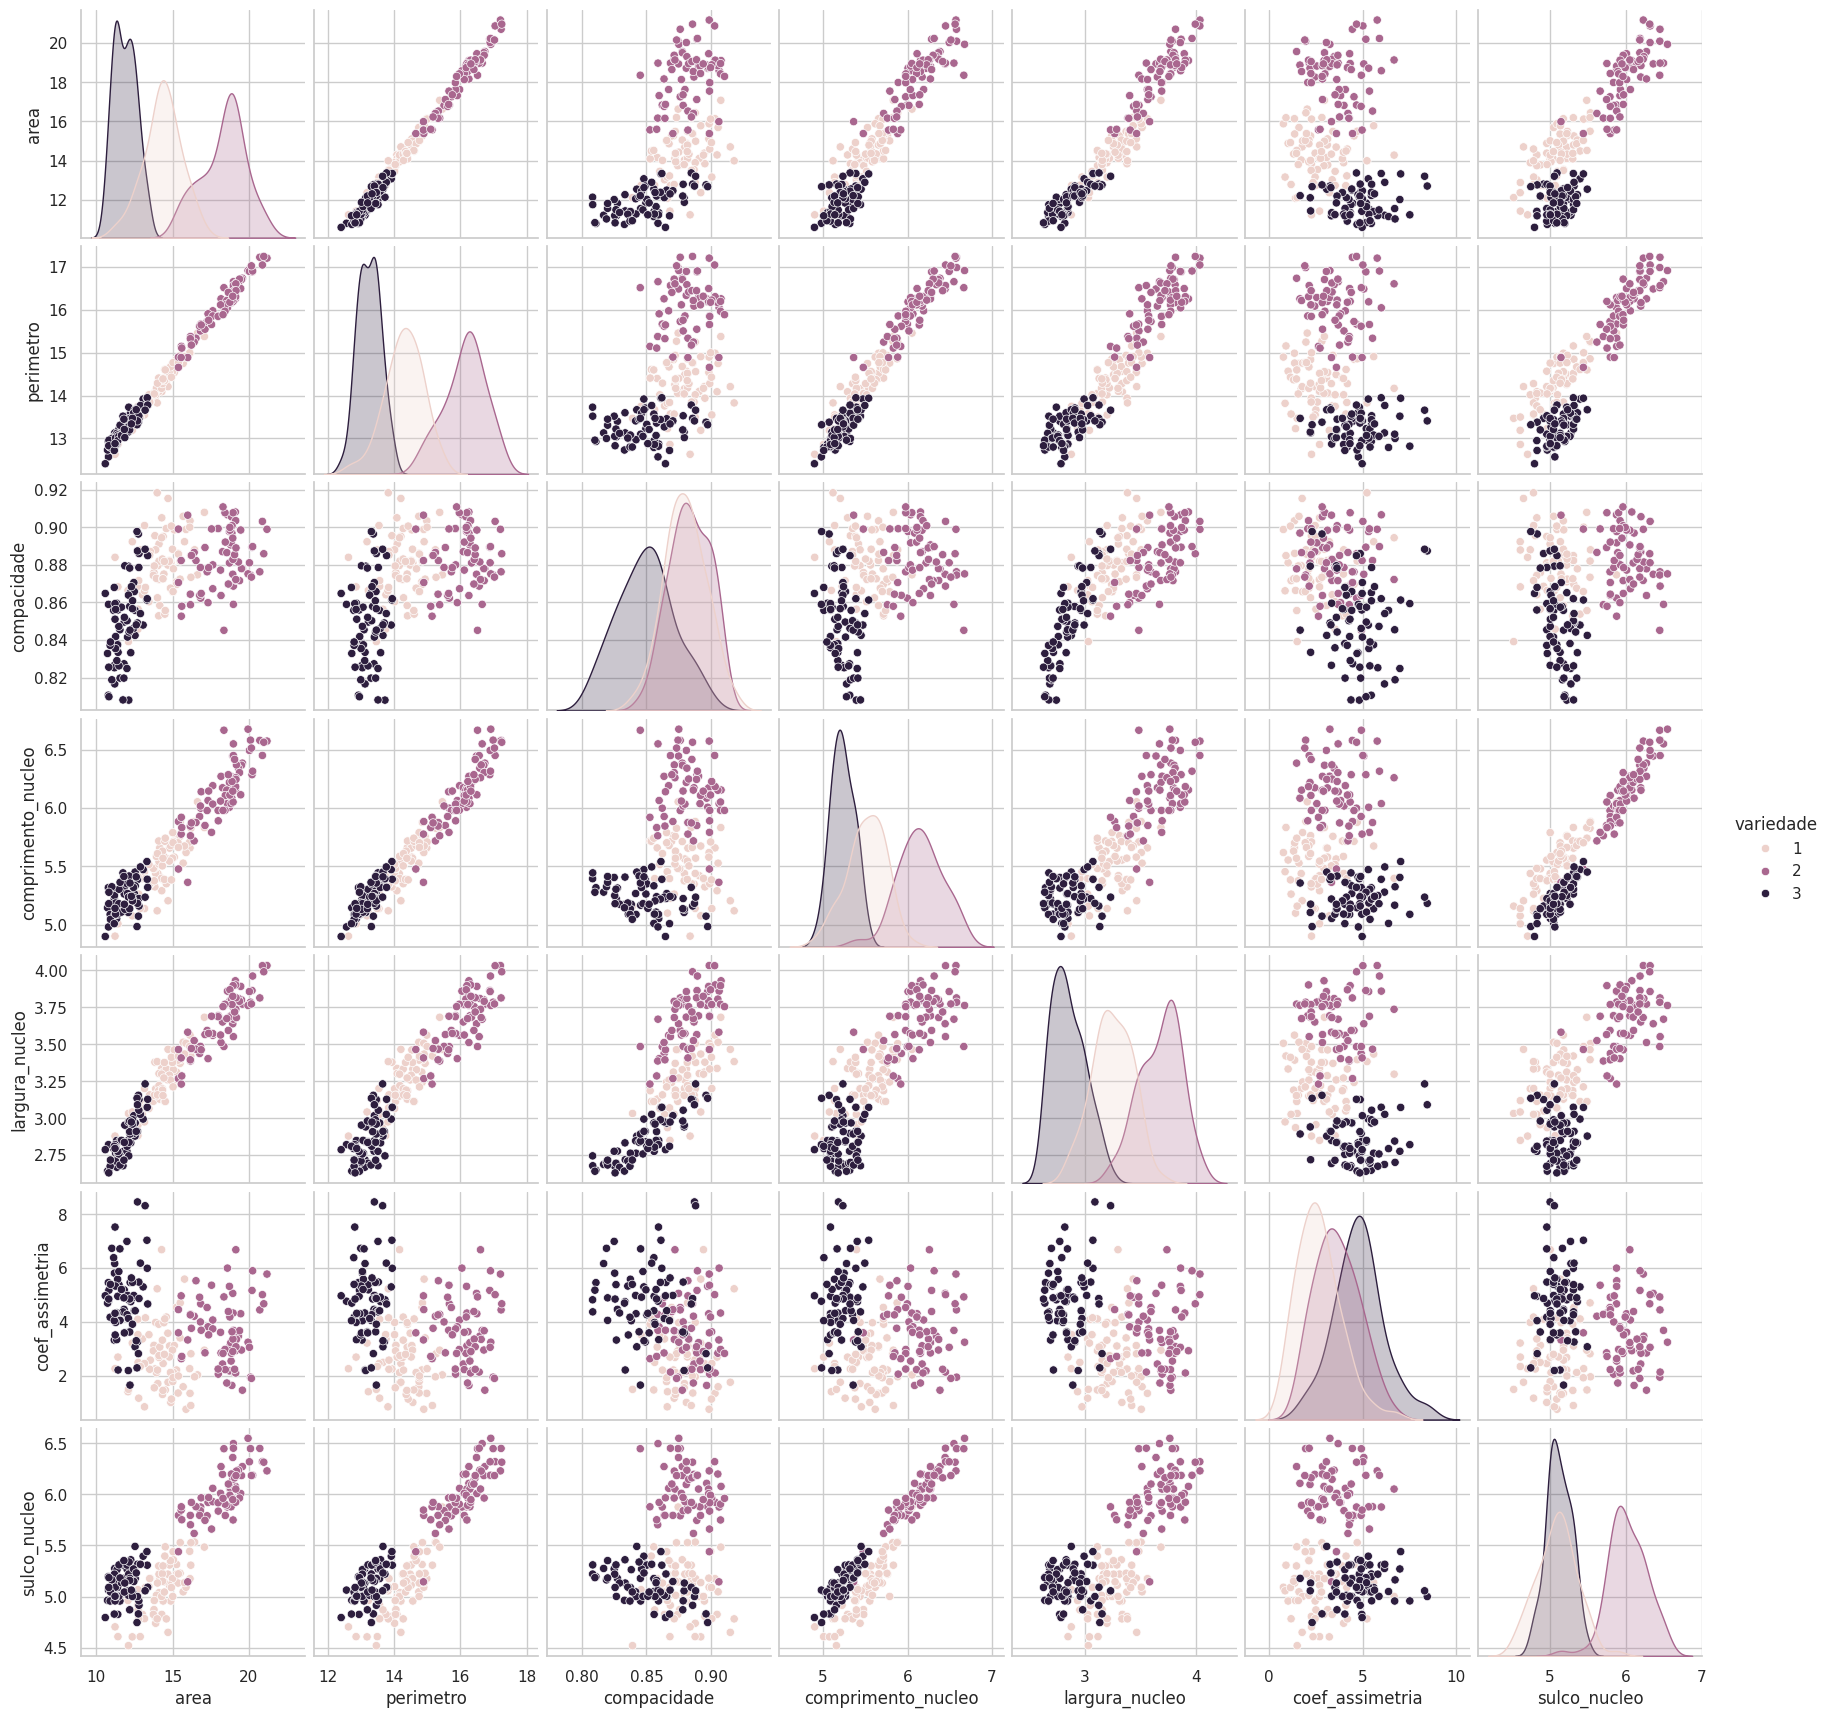

In [7]:
# Pairplot para ver correlação entre variáveis
sns.pairplot(df, hue="variedade")
plt.show()

## ⚙️ Pré-processamento: Escalonamento

In [8]:
# Separar X e y
X = df.drop("variedade", axis=1)
y = df["variedade"]

# Escalonar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 🧠 Treinamento de Modelos

In [9]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modelos
modelos = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"\nModelo: {nome}")
    print(classification_report(y_test, y_pred))


Modelo: KNN
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63


Modelo: SVM
              precision    recall  f1-score   support

           1       0.86      0.90      0.88        20
           2       1.00      0.95      0.98        21
           3       0.91      0.91      0.91        22

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63


Modelo: Random Forest
              precision    recall  f1-score   support

           1       0.77      0.85      0.81        20
           2       1.00      0.95      0.98        21
           3       0.86   

## 🔧 Otimização com GridSearchCV

In [10]:
# Grid Search para KNN
param_grid_knn = {'n_neighbors': list(range(1, 11))}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)

print("Melhor K para KNN:", grid_knn.best_params_)
print(classification_report(y_test, grid_knn.predict(X_test)))

Melhor K para KNN: {'n_neighbors': 5}
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63



In [11]:
# Grid Search para SVM
param_grid_svm = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10]}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)

print("Melhores parâmetros para SVM:", grid_svm.best_params_)
print(classification_report(y_test, grid_svm.predict(X_test)))

Melhores parâmetros para SVM: {'C': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           1       0.85      0.85      0.85        20
           2       1.00      0.95      0.98        21
           3       0.87      0.91      0.89        22

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.91        63



In [12]:
# Otimização do modelo Random Forest com GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Definir a grade de hiperparâmetros válidos
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],  # ✅ 'auto' foi removido
    'bootstrap': [True, False]
}

# Criar o GridSearchCV
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    n_jobs=-1,
    verbose=1  # Mostra o progresso durante o treinamento
)

# Treinar com os dados de treino
grid_rf.fit(X_train, y_train)

# Obter o melhor modelo
best_rf = grid_rf.best_estimator_

# Avaliar o modelo otimizado nos dados de teste
y_pred_rf = best_rf.predict(X_test)

# Mostrar resultados
print("Melhores parâmetros para Random Forest:", grid_rf.best_params_)
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Melhores parâmetros para Random Forest: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           1       0.78      0.90      0.84        20
           2       1.00      0.95      0.98        21
           3       0.90      0.82      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.90      0.89      0.89        63



## 📈 Comparação de Acurácia dos Modelos

KNN (original): 90.48%
SVM (original): 92.06%
Random Forest (otimizado): 88.89%


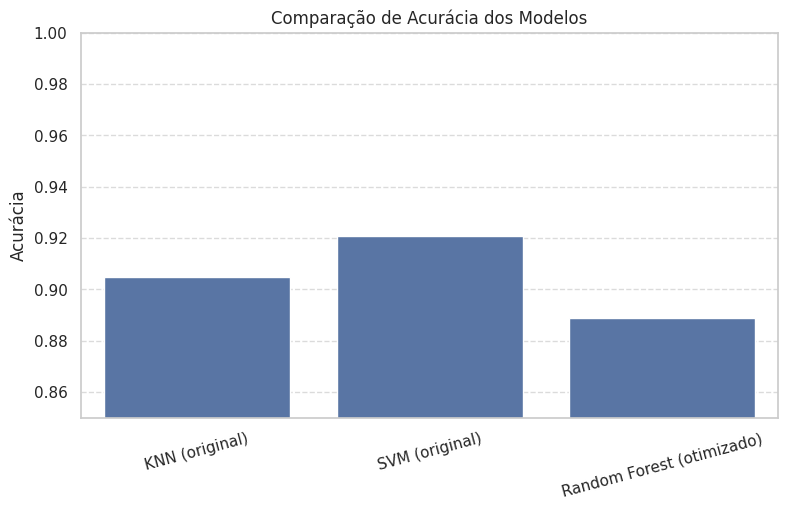

In [ ]:
# Predições dos modelos originais (treinados no bloco 9)
y_pred_knn = modelos["KNN"].predict(X_test)
y_pred_svm = modelos["SVM"].predict(X_test)
y_pred_rf_original = modelos["Random Forest"].predict(X_test)

# Predição do Random Forest otimizado (treinado no bloco 14)
y_pred_rf_otimizado = best_rf.predict(X_test)

# Calcular acurácias
acuracias = {
    "KNN (original)": accuracy_score(y_test, y_pred_knn),
    "SVM (original)": accuracy_score(y_test, y_pred_svm),
    "Random Forest (otimizado)": accuracy_score(y_test, y_pred_rf_otimizado)
}

# Mostrar acurácias no terminal
for modelo, acc in acuracias.items():
    print(f"{modelo}: {acc:.2%}")

# Plotar gráfico de barras sem warning do Seaborn
plt.figure(figsize=(9, 5))
sns.barplot(x=list(acuracias.keys()), y=list(acuracias.values()))
plt.title("Comparação de Acurácia dos Modelos")
plt.ylabel("Acurácia")
plt.ylim(0.85, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.show()


## 🧠 Matriz de Confusão do Melhor Modelo

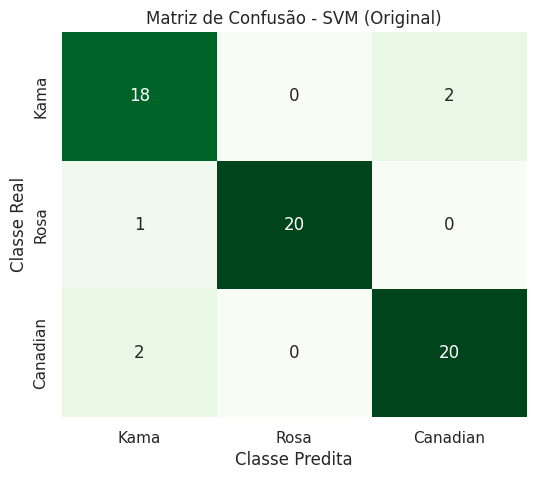

In [ ]:
# Predição do SVM original
y_pred_svm = modelos["SVM"].predict(X_test)

# Gerar matriz de confusão
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plotar matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=["Kama", "Rosa", "Canadian"],
            yticklabels=["Kama", "Rosa", "Canadian"])
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão - SVM (Original)")
plt.show()



## ✅ Conclusão

O modelo **SVM (Support Vector Machine)** apresentou o melhor desempenho geral, com acurácia de **92,06%**. O **KNN** também mostrou bom desempenho, com **90,48%**, seguido pelo **Random Forest otimizado**, com **88,89%**.

Através da matriz de confusão, foi possível observar que a classe **Rosa** foi a mais facilmente reconhecida, enquanto a distinção entre **Kama** e **Canadian** ainda gera confusões em alguns casos.

---
